In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random
from sklearn.feature_extraction import FeatureHasher
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from tabulate import tabulate
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline

In [2]:
# loading the data
data = pd.read_csv('../data/US_Accidents_March23.csv')
data.head(10)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day
5,A-6,Source2,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
6,A-7,Source2,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,Source2,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
8,A-9,Source2,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,Source2,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day


In [3]:
data.columns.tolist()

['ID',
 'Source',
 'Severity',
 'Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Description',
 'Street',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [4]:
# clean the data

# copy the columns that are needed
target_column = [
    "Severity",
    "Street",
    "City",
    "County",
    "State",
    # "Country",
    "Airport_Code",
    "Temperature(F)",
    "Wind_Chill(F)",
    "Humidity(%)",
    "Pressure(in)",
    "Visibility(mi)",
    "Wind_Speed(mph)",
    "Precipitation(in)",
    "Weather_Condition",
    "Amenity",
    "Bump",
    "Crossing",
    "Give_Way",
    "Junction",
    "No_Exit",
    "Railway",
    "Roundabout",
    "Station",
    "Stop",
    "Traffic_Calming",
    "Traffic_Signal",
    "Turning_Loop",
    "Sunrise_Sunset",
    "Civil_Twilight",
    "Nautical_Twilight",
    "Astronomical_Twilight",
]

# extract 10% of the data to speed up the process in POC
df = data[target_column].sample(frac=1, random_state=1)
df.head(10)

,Severity,Street,City,County,State,Airport_Code,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
3815128,2,Adams St,Raleigh,Wake,NC,KRDU,35.0,30.0,59.0,29.86,...,False,False,False,False,False,False,Night,Night,Night,Night
3525263,3,I-80 E,Roseville,Placer,CA,KMCC,53.6,NaN,100.0,30.19,...,False,False,False,False,False,False,Day,Day,Day,Day
6442994,2,Highway 140 E,Klamath Falls,Klamath,OR,KLMT,31.0,22.0,59.0,25.78,...,False,False,False,False,False,False,Night,Night,Night,Night
4273916,2,Biscayne Blvd,Miami,Miami-Dade,FL,KOPF,80.0,80.0,54.0,30.01,...,False,True,False,False,False,False,Day,Day,Day,Day
431659,2,Grand Pkwy E,Tomball,Harris,TX,KDWH,68.0,NaN,96.0,30.02,...,False,False,False,False,False,False,Day,Day,Day,Day
5699412,2,Springfield Rd,Glen Allen,Henrico,VA,KOFP,40.0,40.0,83.0,29.91,...,False,False,False,False,False,False,Night,Night,Night,Night
3790167,2,La Salette St,Houston,Harris,TX,KMCJ,70.0,70.0,81.0,29.86,...,False,False,True,False,False,False,Day,Day,Day,Day
2806425,2,Bailey Rd,Pittsburg,Contra Costa,CA,KCCR,59.0,NaN,72.0,29.95,...,False,False,False,False,False,False,Night,Night,Night,Night
4091164,2,Harbor Fwy S,Los Angeles,Los Angeles,CA,KHHR,51.0,51.0,77.0,30.03,...,False,False,False,False,False,False,Night,Night,Night,Night
7593765,2,I-580 W,Dublin,Alameda,CA,KLVK,55.0,NaN,29.0,30.19,...,False,False,False,False,False,False,Day,Day,Day,Day


# 1. Data preparation

In [5]:
# data cleaning, remove the rows that have null values

df_cleaned = df.copy()
df_cleaned = df_cleaned.dropna()
# df_cleaned = df_cleaned.drop(columns=["Country"]) # US only
df_cleaned = df_cleaned.drop(columns=["Turning_Loop"]) # only one value

df_cleaned_raw = df_cleaned.copy()

In [6]:
def evaluateModel(model, X, y):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    print(f'Accuracy: {accuracy}')
    print(classification_report(y, y_pred))

In [7]:
def plot_roc_curves(model, X_test, y_test):
    """
    Plots ROC curves for each class in a multi-class classification problem.

    Parameters:
    model: The trained classifier.
    X_test (pandas.DataFrame): The test set features.
    y_test (pandas.Series): The test set target values.
    label_counts (pandas.Series): The counts of each label in the target variable.

    Returns:
    None
    """
    # Get predicted probabilities for each class
    y_pred_proba = model.predict_proba(X_test)

    # Define colors for each severity level
    severity_colors = ['green', 'gold', 'orange', 'red']

    # Initialize a list to store the AUC values
    auc_values = []

    # Loop over each class index
    for class_index in range(4):
        # Assuming binary classification, extract probabilities of the positive class
        y_pred_proba_positive = y_pred_proba[:, class_index]

        # Create a binary label array indicating the positive class
        y_test_binary = np.where(y_test == class_index, 1, 0)

        # Compute the false positive rate, true positive rate, and threshold values
        fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_proba_positive)

        # Compute the area under the ROC curve
        roc_auc = auc(fpr, tpr)
        auc_values.append(roc_auc)

        # Plot the ROC curve for the current index
        plt.plot(fpr, tpr, lw=2, color=severity_colors[class_index], label='ROC curve for severity %d (area = %0.2f)' % (class_index, roc_auc))

    # Calculate the average AUC
    average_auc = np.mean(auc_values)

    # Plot the random curve
    plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')

    # Set the plot limits and labels
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

    print(f'Average ROC AUC: {average_auc}')


In [8]:
def get_average_auc(model, X_test, y_test, print_results=False):
    """
    Get the average AUC for each class in a multi-class classification problem.
    
    Parameters:
    model: The trained classifier.
    X_test (pandas.DataFrame): The test set features.
    y_test (pandas.Series): The test set target values.
    label_counts (pandas.Series): The counts of each label in the target variable.

    Returns:
    average_auc (float): The average AUC across all classes.
    """
    # Get predicted probabilities for each class
    y_pred_proba = model.predict_proba(X_test)

    # Define colors for each severity level
    severity_colors = ['green', 'gold', 'orange', 'red']

    # Initialize a list to store the AUC values
    auc_values = []

    # Loop over each class index
    for class_index in range(4):
        # Assuming binary classification, extract probabilities of the positive class
        y_pred_proba_positive = y_pred_proba[:, class_index]

        # Create a binary label array indicating the positive class
        y_test_binary = np.where(y_test == class_index, 1, 0)

        # Compute the false positive rate, true positive rate, and threshold values
        fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_proba_positive)

        # Compute the area under the ROC curve
        roc_auc = auc(fpr, tpr)
        auc_values.append(roc_auc)

    # Calculate the average AUC
    average_auc = np.mean(auc_values)
    
    if print_results:
        print(f'Average ROC AUC: {average_auc}')
        
    return average_auc


In [9]:
# Assuming you have a DataFrame named 'df'

# Calculate the number of unique values in each column
unique_counts = df.nunique()

# Convert the Series to a DataFrame for better formatting
unique_counts_df = pd.DataFrame(unique_counts, columns=['Unique Counts'])

# Add a new column with two unique values
unique_counts_df['Example'] = df.iloc[0]

# Print the table using tabulate
table = tabulate(unique_counts_df, headers='keys', tablefmt='pipe')

# Print the table
print(table)

|                       |   Unique Counts | Example   |
|:----------------------|----------------:|:----------|
| Severity              |               4 | 2         |
| Street                |          336306 | Adams St  |
| City                  |           13678 | Raleigh   |
| County                |            1871 | Wake      |
| State                 |              49 | NC        |
| Airport_Code          |            2045 | KRDU      |
| Temperature(F)        |             860 | 35.0      |
| Wind_Chill(F)         |            1001 | 30.0      |
| Humidity(%)           |             100 | 59.0      |
| Pressure(in)          |            1144 | 29.86     |
| Visibility(mi)        |              92 | 10.0      |
| Wind_Speed(mph)       |             184 | 6.0       |
| Precipitation(in)     |             299 | 0.0       |
| Weather_Condition     |             144 | Fair      |
| Amenity               |               2 | False     |
| Bump                  |               2 | Fals

# 1. First time training

In [10]:
# convert categorical variables to numerical

print(df_cleaned.head(10))
df_encoded = df_cleaned.copy()

label_encoder = LabelEncoder()
categorical_features = [
    "Severity",
    "Street",
    "City",
    "County",
    "State",
    # "Country",
    "Airport_Code",
    "Weather_Condition",
    "Amenity",
    "Bump",
    "Crossing",
    "Give_Way",
    "Junction",
    "No_Exit",
    "Railway",
    "Roundabout",
    "Station",
    "Stop",
    "Traffic_Calming",
    "Traffic_Signal",
    # "Turning_Loop",
    "Sunrise_Sunset",
    "Civil_Twilight",
    "Nautical_Twilight",
    "Astronomical_Twilight",
]

for column in categorical_features:
    df_encoded[column] = label_encoder.fit_transform(df_cleaned[column])

df_encoded.head(10)

         Severity             Street           City        County State  \
3815128         2           Adams St        Raleigh          Wake    NC   
6442994         2      Highway 140 E  Klamath Falls       Klamath    OR   
4273916         2      Biscayne Blvd          Miami    Miami-Dade    FL   
5699412         2     Springfield Rd     Glen Allen       Henrico    VA   
3790167         2      La Salette St        Houston        Harris    TX   
4091164         2       Harbor Fwy S    Los Angeles   Los Angeles    CA   
6194719         2            Troy Rd     Parsippany        Morris    NJ   
5945440         2    King William Rd   King William  King William    VA   
1625293         2  Chestnut Ridge Rd        Gaffney      Cherokee    SC   
5137059         4              IN-57      Haubstadt        Gibson    IN   

        Airport_Code  Temperature(F)  Wind_Chill(F)  Humidity(%)  \
3815128         KRDU            35.0           30.0         59.0   
6442994         KLMT            31.0  

,Severity,Street,City,County,State,Airport_Code,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),...,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
3815128,1,3307,8253,1626,25,1526,35.0,30.0,59.0,29.86,...,0,0,0,0,0,0,1,1,1,1
6442994,1,51813,5148,821,35,1065,31.0,22.0,59.0,25.78,...,0,0,0,0,0,0,1,1,1,1
4273916,1,11585,6362,1010,8,1371,80.0,80.0,54.0,30.01,...,0,0,1,0,0,0,0,0,0,0
5699412,1,115753,3755,694,43,1339,40.0,40.0,83.0,29.91,...,0,0,0,0,0,0,1,1,1,1
3790167,1,60503,4608,676,41,1139,70.0,70.0,81.0,29.86,...,0,0,0,1,0,0,0,0,0,0
4091164,1,189105,5725,903,3,839,51.0,51.0,77.0,30.03,...,0,0,0,0,0,0,1,1,1,1
6194719,1,260892,7685,1049,29,1211,30.0,30.0,75.0,30.09,...,0,0,0,0,0,0,1,1,1,1
5945440,1,59332,5108,812,43,1887,87.0,87.0,66.0,29.89,...,0,0,0,1,0,0,0,0,0,0
1625293,1,161587,3604,287,38,581,58.0,58.0,91.0,28.34,...,0,0,0,0,0,0,1,1,1,1
5137059,3,195364,4268,590,13,622,56.0,56.0,80.0,29.65,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# splitting the data into features (X) and target (y)
X = df_encoded.drop('Severity', axis=1)
y = df_encoded['Severity']

print(f'X shape: {X.shape}, y shape: {y.shape}')

X shape: (5208040, 29), y shape: (5208040,)


In [12]:
# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (4166432, 29), y_train shape: (4166432,)
X_test shape: (1041608, 29), y_test shape: (1041608,)


In [13]:
# training the model
# default using one-to-rest(OvR) strategy
rfc = RandomForestClassifier(n_estimators=100) # n_estimators is the number of trees
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
# evaluating the model

print("Train")
evaluateModel(rfc, X_train, y_train)
print("Test")
evaluateModel(rfc, X_test, y_test)


Train
Accuracy: 0.9867771752905123
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     49507
           1       0.99      1.00      0.99   3551027
           2       0.99      0.98      0.98    466204
           3       0.91      0.67      0.77     99694

    accuracy                           0.99   4166432
   macro avg       0.97      0.91      0.93   4166432
weighted avg       0.99      0.99      0.99   4166432

Test
Accuracy: 0.8659610909286412
              precision    recall  f1-score   support

           0       0.77      0.18      0.29     12415
           1       0.88      0.97      0.93    887340
           2       0.65      0.29      0.40    116906
           3       0.32      0.15      0.20     24947

    accuracy                           0.87   1041608
   macro avg       0.65      0.40      0.45   1041608
weighted avg       0.84      0.87      0.84   1041608



Train


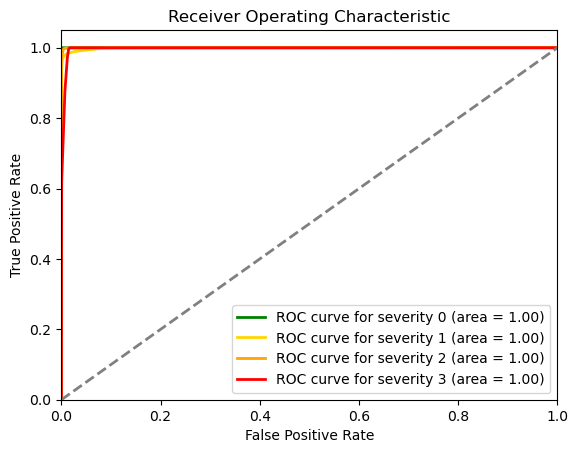

Average ROC AUC: 0.9991632342330766
Average ROC AUC: 0.9991632342330766
Test


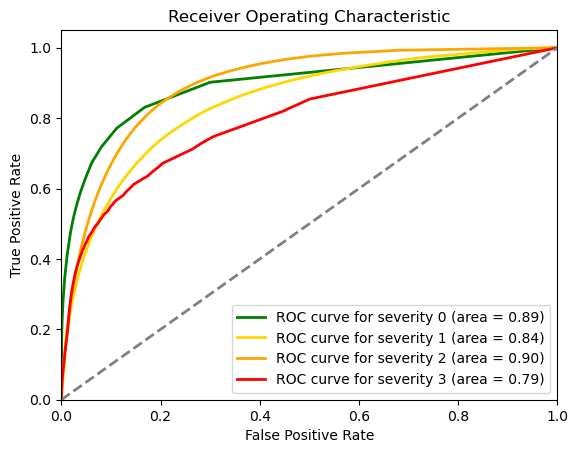

Average ROC AUC: 0.8573094773062804
Average ROC AUC: 0.8573094773062804


In [15]:
print("Train")
plot_roc_curves(rfc, X_train, y_train)
auc_rfc_train = get_average_auc(rfc, X_train, y_train, print_results=True)
print("Test")
plot_roc_curves(rfc, X_test, y_test)
auc_rfc_test = get_average_auc(rfc, X_test, y_test, print_results=True)

# 2. Try to handle imbalance data

## i. Under sampleing

In [16]:
# convert categorical variables to numerical

print(df_cleaned.head(10))
df_encoded = df_cleaned.copy()

label_encoder = LabelEncoder()
categorical_features = [
    "Severity",
    "Street",
    "City",
    "County",
    "State",
    # "Country",
    "Airport_Code",
    "Weather_Condition",
    "Amenity",
    "Bump",
    "Crossing",
    "Give_Way",
    "Junction",
    "No_Exit",
    "Railway",
    "Roundabout",
    "Station",
    "Stop",
    "Traffic_Calming",
    "Traffic_Signal",
    # "Turning_Loop",
    "Sunrise_Sunset",
    "Civil_Twilight",
    "Nautical_Twilight",
    "Astronomical_Twilight",
]

for column in categorical_features:
    df_encoded[column] = label_encoder.fit_transform(df_cleaned[column])

df_encoded.head(10)

         Severity             Street           City        County State  \
3815128         2           Adams St        Raleigh          Wake    NC   
6442994         2      Highway 140 E  Klamath Falls       Klamath    OR   
4273916         2      Biscayne Blvd          Miami    Miami-Dade    FL   
5699412         2     Springfield Rd     Glen Allen       Henrico    VA   
3790167         2      La Salette St        Houston        Harris    TX   
4091164         2       Harbor Fwy S    Los Angeles   Los Angeles    CA   
6194719         2            Troy Rd     Parsippany        Morris    NJ   
5945440         2    King William Rd   King William  King William    VA   
1625293         2  Chestnut Ridge Rd        Gaffney      Cherokee    SC   
5137059         4              IN-57      Haubstadt        Gibson    IN   

        Airport_Code  Temperature(F)  Wind_Chill(F)  Humidity(%)  \
3815128         KRDU            35.0           30.0         59.0   
6442994         KLMT            31.0  

,Severity,Street,City,County,State,Airport_Code,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),...,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
3815128,1,3307,8253,1626,25,1526,35.0,30.0,59.0,29.86,...,0,0,0,0,0,0,1,1,1,1
6442994,1,51813,5148,821,35,1065,31.0,22.0,59.0,25.78,...,0,0,0,0,0,0,1,1,1,1
4273916,1,11585,6362,1010,8,1371,80.0,80.0,54.0,30.01,...,0,0,1,0,0,0,0,0,0,0
5699412,1,115753,3755,694,43,1339,40.0,40.0,83.0,29.91,...,0,0,0,0,0,0,1,1,1,1
3790167,1,60503,4608,676,41,1139,70.0,70.0,81.0,29.86,...,0,0,0,1,0,0,0,0,0,0
4091164,1,189105,5725,903,3,839,51.0,51.0,77.0,30.03,...,0,0,0,0,0,0,1,1,1,1
6194719,1,260892,7685,1049,29,1211,30.0,30.0,75.0,30.09,...,0,0,0,0,0,0,1,1,1,1
5945440,1,59332,5108,812,43,1887,87.0,87.0,66.0,29.89,...,0,0,0,1,0,0,0,0,0,0
1625293,1,161587,3604,287,38,581,58.0,58.0,91.0,28.34,...,0,0,0,0,0,0,1,1,1,1
5137059,3,195364,4268,590,13,622,56.0,56.0,80.0,29.65,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# splitting the data into features (X) and target (y)
X = df_encoded.drop('Severity', axis=1)
y = df_encoded['Severity']

print(f'X shape: {X.shape}, y shape: {y.shape}')

X shape: (5208040, 29), y shape: (5208040,)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Assume X is your input data and y are your labels

rus = RandomUnderSampler(random_state=42)
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)

In [20]:
# Convert y_pred to a pandas Series
y_pred_series = pd.Series(y_train_undersampled)

# Count the occurrences of each label
label_counts = y_pred_series.value_counts()

# Print the label and its count
for label, count in label_counts.items():
    print("Label:", label, "Count:", count)

Label: 0 Count: 49507
Label: 1 Count: 49507
Label: 2 Count: 49507
Label: 3 Count: 49507


In [21]:
# training the model
# default using one-to-rest(OvR) strategy
rfc_undersampled = RandomForestClassifier(n_estimators=100) # n_estimators is the number of trees
rfc_undersampled.fit(X_train_undersampled, y_train_undersampled)

RandomForestClassifier()

In [22]:
# making predictions
y_pred = rfc_undersampled.predict(X_test)
y_pred

array([2, 2, 1, ..., 3, 1, 2])

In [23]:
# evaluating the model
print("Train")
evaluateModel(rfc_undersampled, X_train_undersampled, y_train_undersampled)
print("Test")
evaluateModel(rfc_undersampled, X_test, y_test)

Train
Accuracy: 0.9971923162381078
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     49507
           1       1.00      0.99      1.00     49507
           2       1.00      1.00      1.00     49507
           3       0.99      1.00      1.00     49507

    accuracy                           1.00    198028
   macro avg       1.00      1.00      1.00    198028
weighted avg       1.00      1.00      1.00    198028

Test
Accuracy: 0.4701087165229146
              precision    recall  f1-score   support

           0       0.06      0.81      0.11     12415
           1       0.96      0.43      0.59    887340
           2       0.27      0.70      0.39    116906
           3       0.09      0.61      0.15     24947

    accuracy                           0.47   1041608
   macro avg       0.34      0.64      0.31   1041608
weighted avg       0.85      0.47      0.56   1041608



Train


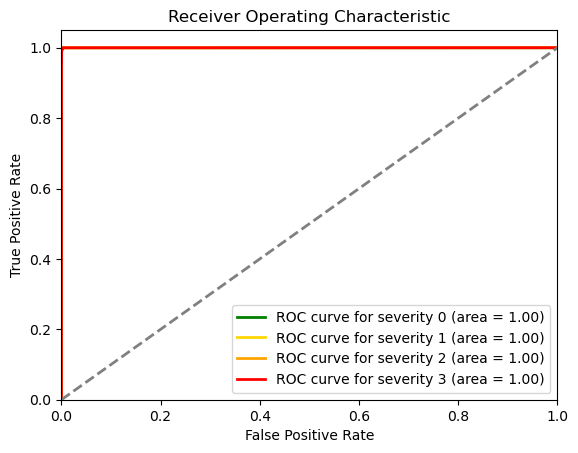

Average ROC AUC: 0.9999807923933528
Test


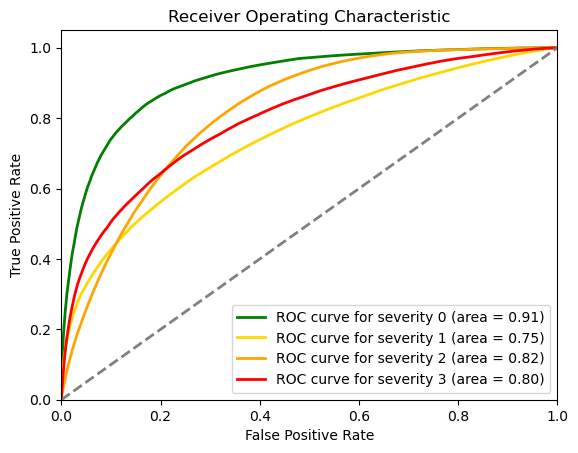

Average ROC AUC: 0.8182514553703706


In [24]:
print("Train")
plot_roc_curves(rfc_undersampled, X_train_undersampled, y_train_undersampled)
print("Test")
plot_roc_curves(rfc_undersampled, X_test, y_test)

## ii. Oversampling

In [25]:
# convert categorical variables to numerical

print(df_cleaned.head(10))
df_encoded = df_cleaned.copy()

label_encoder = LabelEncoder()
categorical_features = [
    "Severity",
    "Street",
    "City",
    "County",
    "State",
    # "Country",
    "Airport_Code",
    "Weather_Condition",
    "Amenity",
    "Bump",
    "Crossing",
    "Give_Way",
    "Junction",
    "No_Exit",
    "Railway",
    "Roundabout",
    "Station",
    "Stop",
    "Traffic_Calming",
    "Traffic_Signal",
    # "Turning_Loop",
    "Sunrise_Sunset",
    "Civil_Twilight",
    "Nautical_Twilight",
    "Astronomical_Twilight",
]

for column in categorical_features:
    df_encoded[column] = label_encoder.fit_transform(df_cleaned[column])

df_encoded.head(10)

         Severity             Street           City        County State  \
3815128         2           Adams St        Raleigh          Wake    NC   
6442994         2      Highway 140 E  Klamath Falls       Klamath    OR   
4273916         2      Biscayne Blvd          Miami    Miami-Dade    FL   
5699412         2     Springfield Rd     Glen Allen       Henrico    VA   
3790167         2      La Salette St        Houston        Harris    TX   
4091164         2       Harbor Fwy S    Los Angeles   Los Angeles    CA   
6194719         2            Troy Rd     Parsippany        Morris    NJ   
5945440         2    King William Rd   King William  King William    VA   
1625293         2  Chestnut Ridge Rd        Gaffney      Cherokee    SC   
5137059         4              IN-57      Haubstadt        Gibson    IN   

        Airport_Code  Temperature(F)  Wind_Chill(F)  Humidity(%)  \
3815128         KRDU            35.0           30.0         59.0   
6442994         KLMT            31.0  

,Severity,Street,City,County,State,Airport_Code,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),...,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
3815128,1,3307,8253,1626,25,1526,35.0,30.0,59.0,29.86,...,0,0,0,0,0,0,1,1,1,1
6442994,1,51813,5148,821,35,1065,31.0,22.0,59.0,25.78,...,0,0,0,0,0,0,1,1,1,1
4273916,1,11585,6362,1010,8,1371,80.0,80.0,54.0,30.01,...,0,0,1,0,0,0,0,0,0,0
5699412,1,115753,3755,694,43,1339,40.0,40.0,83.0,29.91,...,0,0,0,0,0,0,1,1,1,1
3790167,1,60503,4608,676,41,1139,70.0,70.0,81.0,29.86,...,0,0,0,1,0,0,0,0,0,0
4091164,1,189105,5725,903,3,839,51.0,51.0,77.0,30.03,...,0,0,0,0,0,0,1,1,1,1
6194719,1,260892,7685,1049,29,1211,30.0,30.0,75.0,30.09,...,0,0,0,0,0,0,1,1,1,1
5945440,1,59332,5108,812,43,1887,87.0,87.0,66.0,29.89,...,0,0,0,1,0,0,0,0,0,0
1625293,1,161587,3604,287,38,581,58.0,58.0,91.0,28.34,...,0,0,0,0,0,0,1,1,1,1
5137059,3,195364,4268,590,13,622,56.0,56.0,80.0,29.65,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# splitting the data into features (X) and target (y)
X = df_encoded.drop('Severity', axis=1)
y = df_encoded['Severity']

print(f'X shape: {X.shape}, y shape: {y.shape}')

X shape: (5208040, 29), y shape: (5208040,)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Assume X is your input data and y are your labels

rus = RandomOverSampler(random_state=42)
X_train_oversampled, y_train_overresampled = rus.fit_resample(X_train, y_train)

In [29]:
# Convert y_pred to a pandas Series
y_pred_series = pd.Series(y_train_overresampled)

# Count the occurrences of each label
label_counts = y_pred_series.value_counts()

# Print the label and its count
for label, count in label_counts.items():
    print("Label:", label, "Count:", count)

Label: 1 Count: 3551027
Label: 3 Count: 3551027
Label: 2 Count: 3551027
Label: 0 Count: 3551027


In [30]:
# training the model
# default using one-to-rest(OvR) strategy
rfc_oversampled = RandomForestClassifier(n_estimators=100) # n_estimators is the number of trees
rfc_oversampled.fit(X_train_oversampled, y_train_overresampled)

RandomForestClassifier()

In [31]:
# making predictions
y_pred = rfc_oversampled.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [32]:
# evaluating the model
print("Train")
evaluateModel(rfc_oversampled, X_train_oversampled, y_train_overresampled)
print("Test")
evaluateModel(rfc_oversampled, X_test, y_test)

Train
Accuracy: 0.993965618960374
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   3551027
           1       1.00      0.98      0.99   3551027
           2       1.00      1.00      1.00   3551027
           3       0.98      1.00      0.99   3551027

    accuracy                           0.99  14204108
   macro avg       0.99      0.99      0.99  14204108
weighted avg       0.99      0.99      0.99  14204108

Test
Accuracy: 0.8542455511094385
              precision    recall  f1-score   support

           0       0.65      0.23      0.34     12415
           1       0.89      0.95      0.92    887340
           2       0.56      0.36      0.44    116906
           3       0.27      0.26      0.26     24947

    accuracy                           0.85   1041608
   macro avg       0.59      0.45      0.49   1041608
weighted avg       0.84      0.85      0.84   1041608



Train


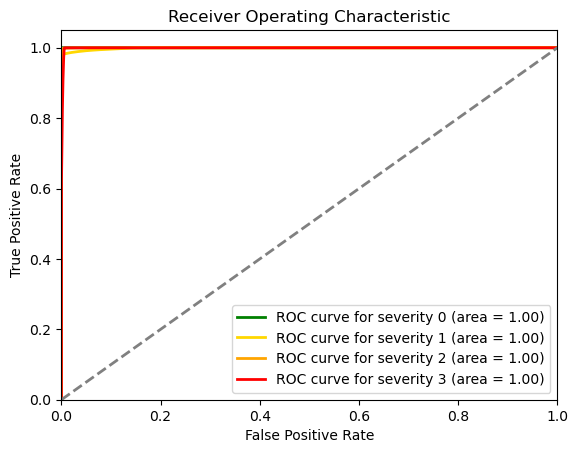

Average ROC AUC: 0.9995136353344911
Test


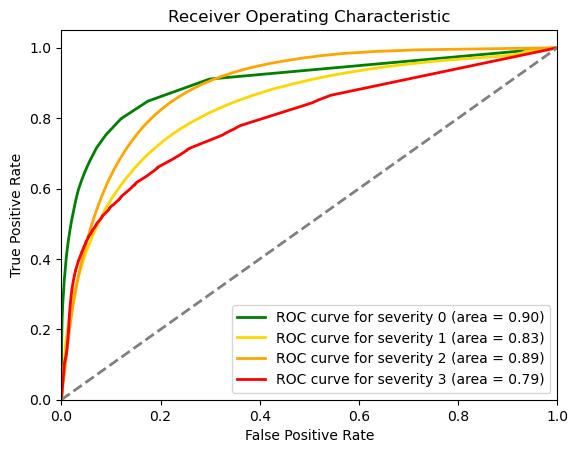

Average ROC AUC: 0.8539967955665819


In [33]:
print("Train")
plot_roc_curves(rfc_oversampled, X_train_oversampled, y_train_overresampled)
print("Test")
plot_roc_curves(rfc_oversampled, X_test, y_test)

# 2. Combine random over-sampling and under-sampling

In [34]:
# convert categorical variables to numerical

df_encoded = df_cleaned.copy()

label_encoder = LabelEncoder()
categorical_features = [
    "Severity",
    "Street",
    "City",
    "County",
    "State",
    # "Country",
    "Airport_Code",
    "Weather_Condition",
    "Amenity",
    "Bump",
    "Crossing",
    "Give_Way",
    "Junction",
    "No_Exit",
    "Railway",
    "Roundabout",
    "Station",
    "Stop",
    "Traffic_Calming",
    "Traffic_Signal",
    # "Turning_Loop",
    "Sunrise_Sunset",
    "Civil_Twilight",
    "Nautical_Twilight",
    "Astronomical_Twilight",
]

for column in categorical_features:
    df_encoded[column] = label_encoder.fit_transform(df_cleaned[column])

df_encoded.head(10)

,Severity,Street,City,County,State,Airport_Code,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),...,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
3815128,1,3307,8253,1626,25,1526,35.0,30.0,59.0,29.86,...,0,0,0,0,0,0,1,1,1,1
6442994,1,51813,5148,821,35,1065,31.0,22.0,59.0,25.78,...,0,0,0,0,0,0,1,1,1,1
4273916,1,11585,6362,1010,8,1371,80.0,80.0,54.0,30.01,...,0,0,1,0,0,0,0,0,0,0
5699412,1,115753,3755,694,43,1339,40.0,40.0,83.0,29.91,...,0,0,0,0,0,0,1,1,1,1
3790167,1,60503,4608,676,41,1139,70.0,70.0,81.0,29.86,...,0,0,0,1,0,0,0,0,0,0
4091164,1,189105,5725,903,3,839,51.0,51.0,77.0,30.03,...,0,0,0,0,0,0,1,1,1,1
6194719,1,260892,7685,1049,29,1211,30.0,30.0,75.0,30.09,...,0,0,0,0,0,0,1,1,1,1
5945440,1,59332,5108,812,43,1887,87.0,87.0,66.0,29.89,...,0,0,0,1,0,0,0,0,0,0
1625293,1,161587,3604,287,38,581,58.0,58.0,91.0,28.34,...,0,0,0,0,0,0,1,1,1,1
5137059,3,195364,4268,590,13,622,56.0,56.0,80.0,29.65,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# splitting the data into features (X) and target (y)
X = df_encoded.drop('Severity', axis=1)
y = df_encoded['Severity']

print(f'X shape: {X.shape}, y shape: {y.shape}')

X shape: (5208040, 29), y shape: (5208040,)


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
# Convert y_pred to a pandas Series
y_pred_series = pd.Series(y_train)

# Count the occurrences of each label
label_counts = y_pred_series.value_counts()

# Print the label and its count
for label, count in label_counts.items():
    print("Label:", label, "Count:", count)

Label: 1 Count: 3551027
Label: 2 Count: 466204
Label: 3 Count: 99694
Label: 0 Count: 49507


In [38]:


# Count the occurrences of each label
label_counts = pd.Series(y_train).value_counts()

# Calculate the desired counts
class_1 = label_counts[1]

# Define the over-sampling and under-sampling strategies
over_sampling_strategy = {0: class_1 // 3, 2: class_1 // 2, 3: class_1 // 3}  # Oversample classes 0 and 3
under_sampling_strategy = {1: class_1 // 1} # Downsample classes 1 and 2

# over_sampling_strategy = {0: class_1 // 3, 3: class_1 // 3}  # Oversample classes 0 and 3
# under_sampling_strategy = {1: class_1 // 2} # Downsample classes 1 and 2

# Calculate the desired counts
half_of_class_1 = label_counts[1] // 2
half_of_class_2 = label_counts[2] // 2

# define pipeline
over = RandomOverSampler(sampling_strategy=over_sampling_strategy)
under = RandomUnderSampler(sampling_strategy=under_sampling_strategy)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

In [39]:
# Convert y_pred to a pandas Series
y_pred_series = pd.Series(y_train_resampled)

# Count the occurrences of each label
label_counts = y_pred_series.value_counts()

# Print the label and its count
for label, count in label_counts.items():
    print("Label:", label, "Count:", count)

Label: 1 Count: 3551027
Label: 2 Count: 1775513
Label: 0 Count: 1183675
Label: 3 Count: 1183675


In [40]:
# training the model
# default using one-to-rest(OvR) strategy
rfc_updown_resampled = RandomForestClassifier(n_estimators=100) # n_estimators is the number of trees
rfc_updown_resampled.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [41]:
# making predictions
y_pred = rfc_updown_resampled.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [42]:
# evaluating the model
print("Train")
evaluateModel(rfc_updown_resampled, X_train_resampled, y_train_resampled)
print("Test")
evaluateModel(rfc_updown_resampled, X_test, y_test)

Train
Accuracy: 0.9895371522077908
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1183675
           1       1.00      0.98      0.99   3551027
           2       0.99      1.00      0.99   1775513
           3       0.95      1.00      0.97   1183675

    accuracy                           0.99   7693890
   macro avg       0.98      0.99      0.99   7693890
weighted avg       0.99      0.99      0.99   7693890

Test
Accuracy: 0.8558613221096613
              precision    recall  f1-score   support

           0       0.65      0.23      0.34     12415
           1       0.89      0.95      0.92    887340
           2       0.58      0.36      0.45    116906
           3       0.27      0.26      0.26     24947

    accuracy                           0.86   1041608
   macro avg       0.60      0.45      0.49   1041608
weighted avg       0.84      0.86      0.84   1041608



Train


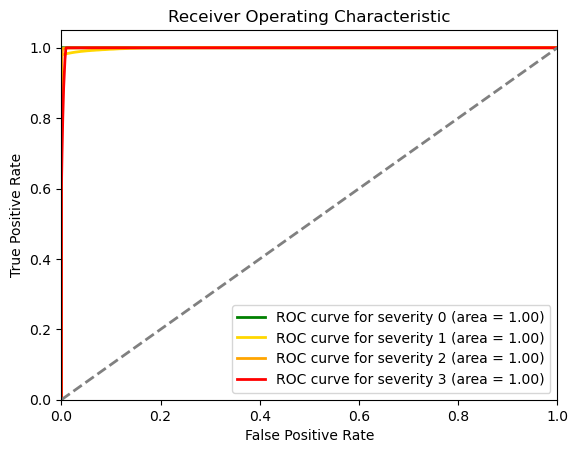

Average ROC AUC: 0.9993575966324736
Test


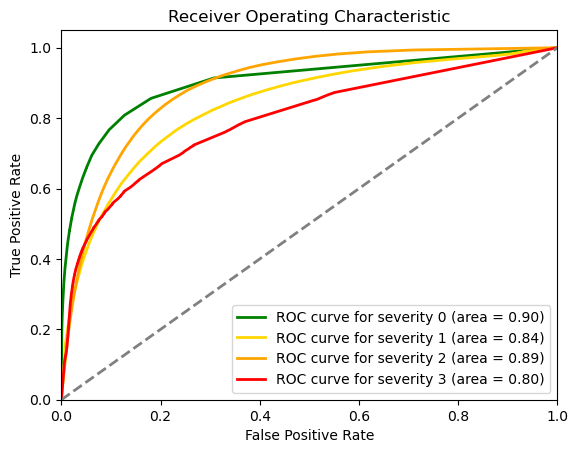

Average ROC AUC: 0.8564271511179216


In [43]:
print("Train")
plot_roc_curves(rfc_updown_resampled, X_train_resampled, y_train_resampled)
print("Test")
plot_roc_curves(rfc_updown_resampled, X_test, y_test)

# 3. Feature extraction

In [44]:
def get_feature_importance(model, columns):
    """
    Returns a pandas Series containing the feature importance values for a given model.

    Parameters:
    model: The trained classifier.
    columns (list): The list of column names.

    Returns:
    pandas.Series: The feature importance values.
    """
    # Get the feature importance values
    importances_scores = model.feature_importances_

    # Match the importances to the correct column names
    # Create a dictionary with the column names as keys
    importances_dict = dict(zip(columns, importances_scores))

    return importances_dict

In [45]:
# Using the updownsampling

# convert categorical variables to numerical

df_encoded = df_cleaned.copy()

label_encoder = LabelEncoder()
categorical_features = [
    "Severity",
    "Street",
    "City",
    "County",
    "State",
    # "Country",
    "Airport_Code",
    "Weather_Condition",
    "Amenity",
    "Bump",
    "Crossing",
    "Give_Way",
    "Junction",
    "No_Exit",
    "Railway",
    "Roundabout",
    "Station",
    "Stop",
    "Traffic_Calming",
    "Traffic_Signal",
    # "Turning_Loop",
    "Sunrise_Sunset",
    "Civil_Twilight",
    "Nautical_Twilight",
    "Astronomical_Twilight",
]

for column in categorical_features:
    df_encoded[column] = label_encoder.fit_transform(df_cleaned[column])

df_encoded.head(10)

,Severity,Street,City,County,State,Airport_Code,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),...,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
3815128,1,3307,8253,1626,25,1526,35.0,30.0,59.0,29.86,...,0,0,0,0,0,0,1,1,1,1
6442994,1,51813,5148,821,35,1065,31.0,22.0,59.0,25.78,...,0,0,0,0,0,0,1,1,1,1
4273916,1,11585,6362,1010,8,1371,80.0,80.0,54.0,30.01,...,0,0,1,0,0,0,0,0,0,0
5699412,1,115753,3755,694,43,1339,40.0,40.0,83.0,29.91,...,0,0,0,0,0,0,1,1,1,1
3790167,1,60503,4608,676,41,1139,70.0,70.0,81.0,29.86,...,0,0,0,1,0,0,0,0,0,0
4091164,1,189105,5725,903,3,839,51.0,51.0,77.0,30.03,...,0,0,0,0,0,0,1,1,1,1
6194719,1,260892,7685,1049,29,1211,30.0,30.0,75.0,30.09,...,0,0,0,0,0,0,1,1,1,1
5945440,1,59332,5108,812,43,1887,87.0,87.0,66.0,29.89,...,0,0,0,1,0,0,0,0,0,0
1625293,1,161587,3604,287,38,581,58.0,58.0,91.0,28.34,...,0,0,0,0,0,0,1,1,1,1
5137059,3,195364,4268,590,13,622,56.0,56.0,80.0,29.65,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# Add random feature

# add a random number to the data
df_random = df_encoded.copy()
df_random['Random'] = np.random.rand(df_random.shape[0])

# splitting the data into features (X) and target (y)
X = df_random.drop('Severity', axis=1)
y = df_random['Severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Convert y_pred to a pandas Series
y_pred_series = pd.Series(y_train)

# Count the occurrences of each label
label_counts = y_pred_series.value_counts()

# Print the label and its count
for label, count in label_counts.items():
    print("Label:", label, "Count:", count)

Label: 1 Count: 3551027
Label: 2 Count: 466204
Label: 3 Count: 99694
Label: 0 Count: 49507


In [48]:


# Count the occurrences of each label
label_counts = pd.Series(y_train).value_counts()

# Calculate the desired counts
class_1 = label_counts[1]

# Define the over-sampling and under-sampling strategies
over_sampling_strategy = {0: class_1 // 3, 2: class_1 // 2, 3: class_1 // 3}  # Oversample classes 0 and 3
under_sampling_strategy = {1: class_1 // 1} # Downsample classes 1 and 2

# over_sampling_strategy = {0: class_1 // 3, 3: class_1 // 3}  # Oversample classes 0 and 3
# under_sampling_strategy = {1: class_1 // 2} # Downsample classes 1 and 2

# Calculate the desired counts
half_of_class_1 = label_counts[1] // 2
half_of_class_2 = label_counts[2] // 2

# define pipeline
over = RandomOverSampler(sampling_strategy=over_sampling_strategy)
under = RandomUnderSampler(sampling_strategy=under_sampling_strategy)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_train_resampled_rdm, y_train_resampled_rdm = pipeline.fit_resample(X_train, y_train)

In [49]:
# Convert y_pred to a pandas Series
y_pred_series = pd.Series(y_train_resampled_rdm)

# Count the occurrences of each label
label_counts = y_pred_series.value_counts()

# Print the label and its count
for label, count in label_counts.items():
    print("Label:", label, "Count:", count)

Label: 1 Count: 3551027
Label: 2 Count: 1775513
Label: 0 Count: 1183675
Label: 3 Count: 1183675


In [50]:
# training the model
# default using one-to-rest(OvR) strategy
rfc_updown_resampled_rdm = RandomForestClassifier(n_estimators=100) # n_estimators is the number of trees
rfc_updown_resampled_rdm.fit(X_train_resampled_rdm, y_train_resampled_rdm)

RandomForestClassifier()

In [51]:
feature_importances = get_feature_importance(rfc_updown_resampled_rdm, X_train.columns)

# Sort the feature importances from high to low
sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Print the feature importance scores
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")

Street: 0.14742606109800396
Random: 0.1010700357079094
Pressure(in): 0.09843734348325679
Humidity(%): 0.08056140104846447
State: 0.06978100032112346
Wind_Chill(F): 0.06689308542272449
Temperature(F): 0.06595661988378693
City: 0.06573413907131043
County: 0.06401070108424846
Airport_Code: 0.061050681231282336
Wind_Speed(mph): 0.05640172996924346
Weather_Condition: 0.03138816271680791
Traffic_Signal: 0.019944482177646158
Visibility(mi): 0.017831930238470857
Crossing: 0.00943487989373576
Precipitation(in): 0.008564818313445886
Junction: 0.00706724442007592
Sunrise_Sunset: 0.006054409463080316
Civil_Twilight: 0.00447900296732809
Nautical_Twilight: 0.004082475840885442
Astronomical_Twilight: 0.003960470969647838
Stop: 0.003182226671228489
Station: 0.0023469712929214677
Amenity: 0.0013401083200291547
Railway: 0.0012087850225811286
Give_Way: 0.0010110461054096337
No_Exit: 0.0004671457550729251
Traffic_Calming: 0.00023042510656024617
Bump: 7.879583223195805e-05
Roundabout: 3.82057148652047e-06


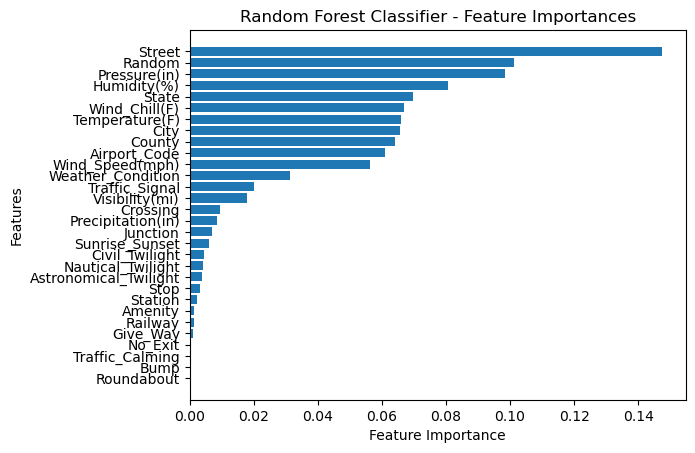

In [52]:
# Extract the feature names and importance scores
sorted_feature_importances = dict(sorted(feature_importances.items(), key=lambda x: x[1], reverse=False))
features = list(sorted_feature_importances.keys())
importances = list(sorted_feature_importances.values())

# Create a horizontal bar chart
plt.barh(range(len(importances)), importances, align='center')
plt.yticks(range(len(importances)), features)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Classifier - Feature Importances')

# Display the chart
plt.show()

# 7. i) Remove feature with lower importance than the random generated features and train again

In [53]:
def train_with_feature_extraction(_df, selected_features, print_full_results=False):

    print(f"Train with selected features: {selected_features}")

    label_encoder = LabelEncoder()
    categorical_features = [
        "Severity",
        "Street",
        "City",
        "County",
        "State",
        # "Country",
        "Airport_Code",
        "Weather_Condition",
        "Amenity",
        "Bump",
        "Crossing",
        "Give_Way",
        "Junction",
        "No_Exit",
        "Railway",
        "Roundabout",
        "Station",
        "Stop",
        "Traffic_Calming",
        "Traffic_Signal",
        # "Turning_Loop",
        "Sunrise_Sunset",
        "Civil_Twilight",
        "Nautical_Twilight",
        "Astronomical_Twilight",
    ]

    for column in categorical_features:
        _df[column] = label_encoder.fit_transform(_df[column])

    # splitting the data into features (X) and target (y)
    X = _df[selected_features]
    y = _df['Severity']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    # Count the occurrences of each label
    label_counts = pd.Series(y_train).value_counts()

    # Calculate the desired counts
    class_1 = label_counts[1]

    # Define the over-sampling and under-sampling strategies
    over_sampling_strategy = {0: class_1 // 5, 2: class_1 // 2, 3: class_1 // 5}  # Oversample classes 0 and 3
    under_sampling_strategy = {1: class_1 // 1} # Downsample classes 1 and 2

    # over_sampling_strategy = {0: class_1 // 3, 3: class_1 // 3}  # Oversample classes 0 and 3
    # under_sampling_strategy = {1: class_1 // 2} # Downsample classes 1 and 2

    # define pipeline
    over = RandomOverSampler(sampling_strategy=over_sampling_strategy)
    under = RandomUnderSampler(sampling_strategy=under_sampling_strategy)
    steps = [('o', over), ('u', under)]
    pipeline = Pipeline(steps=steps)

    # transform the dataset
    X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

    # training the model
    # default using one-to-rest(OvR) strategy
    _rfc_updown_resampled = RandomForestClassifier(n_estimators=100) # n_estimators is the number of trees
    _rfc_updown_resampled.fit(X_train_resampled, y_train_resampled)

    auc = get_average_auc(_rfc_updown_resampled, X_test, y_test, print_results=True)

    # evaluating the model
    if print_full_results:
        print("Train")
        evaluateModel(_rfc_updown_resampled, X_train_resampled, y_train_resampled)
        print("Test")
        evaluateModel(_rfc_updown_resampled, X_test, y_test)

        print("Train")
        plot_roc_curves(_rfc_updown_resampled, X_train_resampled, y_train_resampled)
        print("Test")
        plot_roc_curves(_rfc_updown_resampled, X_test, y_test)
    
    return auc

    




    

In [54]:
# remove all feature importance less than 0.01 and retrain the model

# Create a list of features with importance greater than or equal to 0.01
selected_features = [feature for feature, importance in feature_importances.items() if importance > feature_importances['Random']]

selected_features

['Street']

Train with selected features: ['Street']
Average ROC AUC: 0.7778869996581608
Train
Accuracy: 0.6810913079243214
              precision    recall  f1-score   support

           0       0.69      0.49      0.57    710205
           1       0.73      0.76      0.74   3551027
           2       0.59      0.73      0.65   1775513
           3       0.72      0.38      0.50    710205

    accuracy                           0.68   6746950
   macro avg       0.68      0.59      0.62   6746950
weighted avg       0.69      0.68      0.68   6746950

Test
Accuracy: 0.7276691423260958
              precision    recall  f1-score   support

           0       0.08      0.26      0.13     12415
           1       0.93      0.75      0.83    887340
           2       0.33      0.71      0.45    116906
           3       0.19      0.24      0.21     24947

    accuracy                           0.73   1041608
   macro avg       0.38      0.49      0.40   1041608
weighted avg       0.83      0.73      

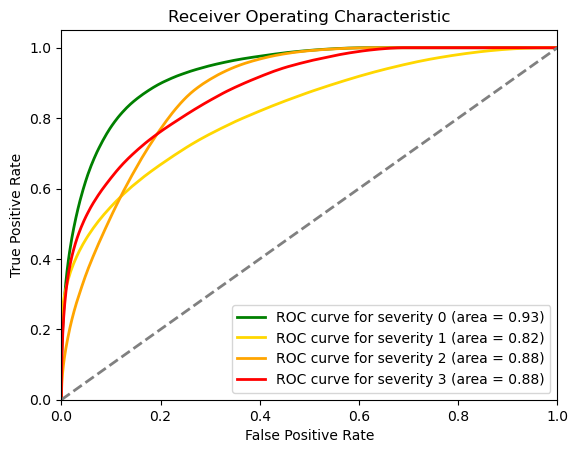

Average ROC AUC: 0.876636955994795
Test


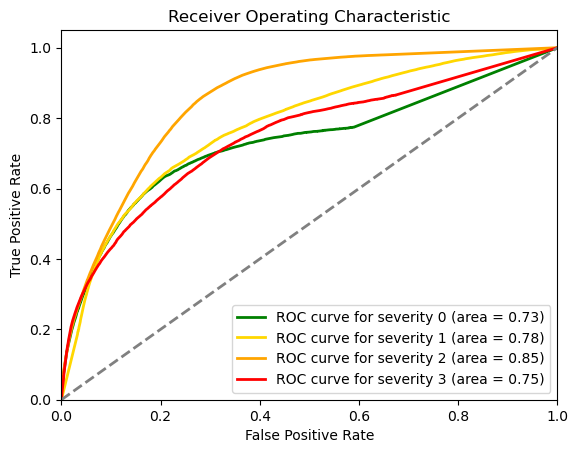

Average ROC AUC: 0.7778869996581608


0.7778869996581608

In [55]:
train_with_feature_extraction(df_cleaned, selected_features, print_full_results=True)

# 7. ii) Remove feature with importance < 0.01 and train again

In [56]:
# remove all feature importance less than 0.01 and retrain the model

# Create a list of features with importance greater than or equal to 0.01
selected_features = [feature for feature, importance in feature_importances.items() if importance > 0.01 and feature != 'Random']

selected_features

['Street',
 'City',
 'County',
 'State',
 'Airport_Code',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Speed(mph)',
 'Weather_Condition',
 'Traffic_Signal']

Train with selected features: ['Street', 'City', 'County', 'State', 'Airport_Code', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Weather_Condition', 'Traffic_Signal']
Average ROC AUC: 0.8553905841835088
Train
Accuracy: 0.9864747774920519
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    710205
           1       1.00      0.98      0.99   3551027
           2       0.99      1.00      0.99   1775513
           3       0.92      1.00      0.96    710205

    accuracy                           0.99   6746950
   macro avg       0.98      0.99      0.98   6746950
weighted avg       0.99      0.99      0.99   6746950

Test
Accuracy: 0.854490364897351
              precision    recall  f1-score   support

           0       0.62      0.25      0.35     12415
           1       0.90      0.94      0.92    887340
           2       0.56      0.40      0.46    116906
           3      

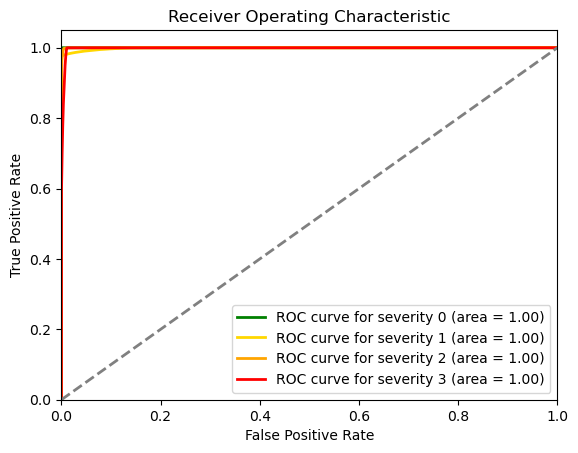

Average ROC AUC: 0.9993075278968312
Test


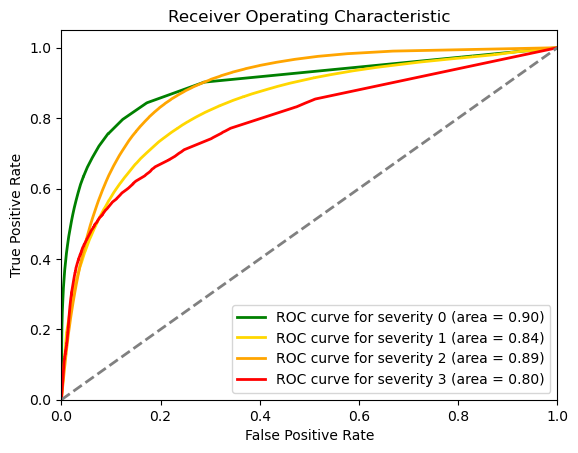

Average ROC AUC: 0.8553905841835088


0.8553905841835088

In [57]:
train_with_feature_extraction(df_cleaned, selected_features, print_full_results=True)

# 7. iii) Remove feature with importance < 0.001 and train again

In [58]:
# remove all feature importance less than 0.01 and retrain the model

# Create a list of features with importance greater than or equal to 0.01
selected_features = [feature for feature, importance in feature_importances.items() if importance > 0.001 and feature != 'Random']

selected_features

['Street',
 'City',
 'County',
 'State',
 'Airport_Code',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Amenity',
 'Crossing',
 'Give_Way',
 'Junction',
 'Railway',
 'Station',
 'Stop',
 'Traffic_Signal',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

Train with selected features: ['Street', 'City', 'County', 'State', 'Airport_Code', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Crossing', 'Give_Way', 'Junction', 'Railway', 'Station', 'Stop', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
Average ROC AUC: 0.8599043395603134
Train
Accuracy: 0.9881759906328045
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    710205
           1       1.00      0.98      0.99   3551027
           2       0.99      1.00      0.99   1775513
           3       0.92      1.00      0.96    710205

    accuracy                           0.99   6746950
   macro avg       0.98      0.99      0.99   6746950
weighted avg       0.99      0.99      0.99   6746950

Test
Accuracy: 0.8575692583006275
              precision    recall  f1-score   support


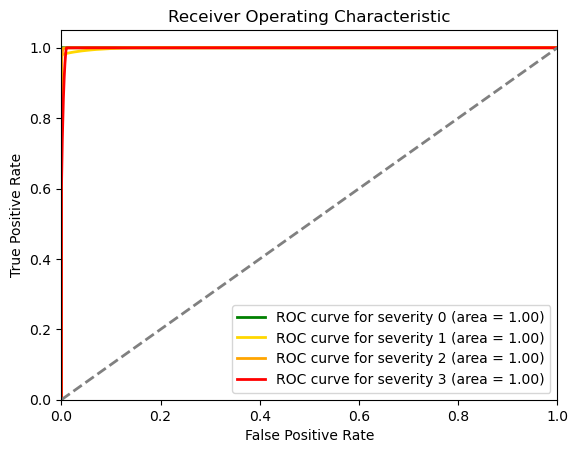

Average ROC AUC: 0.9994009064858398
Test


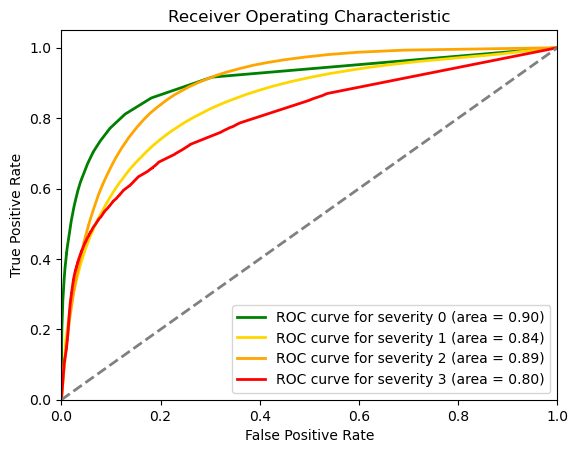

Average ROC AUC: 0.8599043395603134


0.8599043395603134

In [59]:
train_with_feature_extraction(df_cleaned, selected_features, print_full_results=True)

# 7. iv) Apply interative feature selection and train again

In [60]:
sorted_feature_importances = feature_importances.copy()

sorted_feature_importances.pop('Random')

# Sort dictionary by value
sorted_feature_importances = {k: v for k, v in sorted(sorted_feature_importances.items(), key=lambda item: item[1], reverse=True)}

initial_auc = train_with_feature_extraction(df_cleaned, sorted_feature_importances.keys(), print_full_results=False)
print(f'Initial AUC: {initial_auc}')

# Start iterative feature removal
while True:
    
    # Find least important feature
    least_important = sorted_feature_importances.popitem()[0]

    print(f'Removing {least_important}')

    print(f'Featrues imported: {sorted_feature_importances.keys()}')
    print(f'Features remaining: {len(sorted_feature_importances)}')

    new_auc = train_with_feature_extraction(df_cleaned, sorted_feature_importances.keys(), print_full_results=False)
    
    # If performance decreases, stop the process
    if new_auc < initial_auc:
        print('Performance decreased. Stopping feature removal.')
        break
    else:
        initial_auc = new_auc
        print('Performance increased. Continuing feature removal. new_auc: {}', new_auc)

Train with selected features: dict_keys(['Street', 'Pressure(in)', 'Humidity(%)', 'State', 'Wind_Chill(F)', 'Temperature(F)', 'City', 'County', 'Airport_Code', 'Wind_Speed(mph)', 'Weather_Condition', 'Traffic_Signal', 'Visibility(mi)', 'Crossing', 'Precipitation(in)', 'Junction', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Stop', 'Station', 'Amenity', 'Railway', 'Give_Way', 'No_Exit', 'Traffic_Calming', 'Bump', 'Roundabout'])
Average ROC AUC: 0.8575898923836857
Initial AUC: 0.8575898923836857
Removing Roundabout
Featrues imported: dict_keys(['Street', 'Pressure(in)', 'Humidity(%)', 'State', 'Wind_Chill(F)', 'Temperature(F)', 'City', 'County', 'Airport_Code', 'Wind_Speed(mph)', 'Weather_Condition', 'Traffic_Signal', 'Visibility(mi)', 'Crossing', 'Precipitation(in)', 'Junction', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Stop', 'Station', 'Amenity', 'Railway', 'Give_Way', 'No_Exit', 'Traffic_Calming', 'Bump'])

# 4. Final Result

Train with selected features: dict_keys(['Street', 'City', 'County', 'State', 'Airport_Code', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'])
Average ROC AUC: 0.8587592606051974
Train
Accuracy: 0.9881822156678203
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    710205
           1       1.00      0.98      0.99   3551027
           2       0.99      1.00      0.99   1775513
           3       0.92      1.00      0.96    710205

    accuracy                           0.99   6746950
   macro avg       0.98      0.99      0.99   6746950
weighted avg       0.99      0.99      0.99   6746950

Test
Accuracy: 0.8568338568828197
     

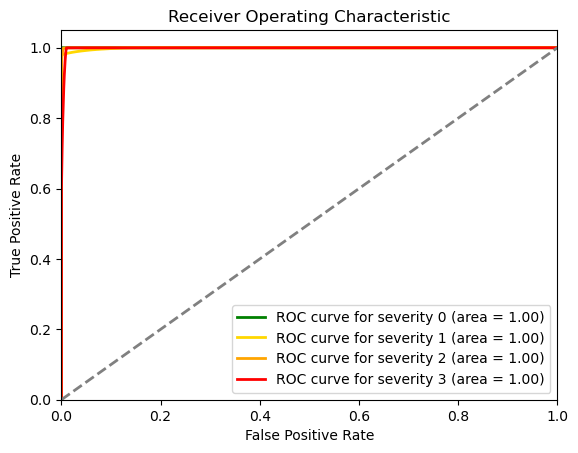

Average ROC AUC: 0.9993984068330635
Test


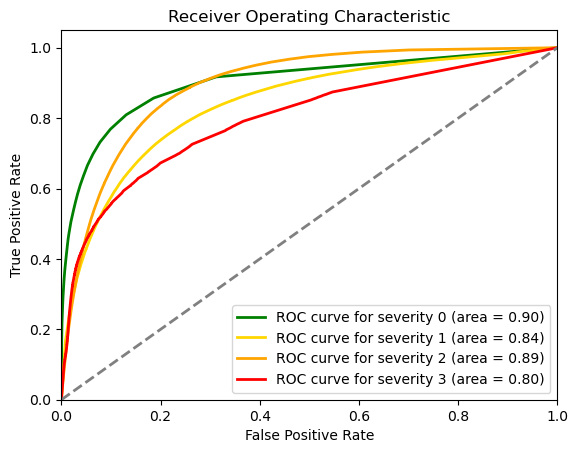

Average ROC AUC: 0.8587592606051974


In [61]:
sorted_feature_importances = feature_importances.copy()
sorted_feature_importances.pop('Random')
sorted_feature_importances.pop('Roundabout')

initial_auc = train_with_feature_extraction(df_cleaned, sorted_feature_importances.keys(), print_full_results=True)